In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df = pd.read_excel('Muscular Data_Project_10.xlsx')
print(df.head())

   Age  creatine_Kinase  Hemopexin  Pyrovate_Kinase  Carrier
0   27             22.0       99.0             11.0        0
1   31             29.0       94.0             12.0        0
2   22             22.0       85.5             15.0        0
3   25             41.0       87.3             15.0        0
4   26             28.0       93.5              7.0        0


In [67]:
results = smf.logit('Carrier ~ Age + creatine_Kinase + Hemopexin + Pyrovate_Kinase',data=df).fit()
print(results.summary())
results.pred_table(threshold=0.5)

Optimization terminated successfully.
         Current function value: 0.229706
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                Carrier   No. Observations:                  201
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            4
Date:                Tue, 10 Nov 2020   Pseudo R-squ.:                  0.6391
Time:                        12:11:46   Log-Likelihood:                -46.171
converged:                       True   LL-Null:                       -127.94
                                        LLR p-value:                 2.548e-34
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -17.9558      2.988     -6.009      0.000     -23.812     -12.099
Age          

array([[129.,   5.],
       [ 13.,  54.]])

In [27]:
#df = df.fillna(0)
df = pd.read_excel('Muscular Data_Project_10.xlsx')
print(df.head())
df.insert(0,'Const',1)
print(df.head())
#Y = df['Carrier']
#X = df.drop(columns=['Carrier'])
#X = smf.add_constant(X)
model = smf.logit('Carrier ~ Age + creatine_Kinase + Hemopexin + Pyrovate_Kinase',data=df)
results = model.fit()
results.params

   Age  creatine_Kinase  Hemopexin  Pyrovate_Kinase  Carrier
0   27             22.0       99.0             11.0        0
1   31             29.0       94.0             12.0        0
2   22             22.0       85.5             15.0        0
3   25             41.0       87.3             15.0        0
4   26             28.0       93.5              7.0        0
   Const  Age  creatine_Kinase  Hemopexin  Pyrovate_Kinase  Carrier
0      1   27             22.0       99.0             11.0        0
1      1   31             29.0       94.0             12.0        0
2      1   22             22.0       85.5             15.0        0
3      1   25             41.0       87.3             15.0        0
4      1   26             28.0       93.5              7.0        0
Optimization terminated successfully.
         Current function value: 0.229706
         Iterations 10


Intercept         -17.955779
Age                 0.145013
creatine_Kinase     0.052196
Hemopexin           0.084761
Pyrovate_Kinase     0.140015
dtype: float64

In [28]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:                Carrier   No. Observations:                  201
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            4
Date:                Tue, 10 Nov 2020   Pseudo R-squ.:                  0.6391
Time:                        08:03:39   Log-Likelihood:                -46.171
converged:                       True   LL-Null:                       -127.94
                                        LLR p-value:                 2.548e-34
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -17.9558      2.988     -6.009      0.000     -23.812     -12.099
Age                 0.1450      0.041      3.551      0.000       0.065       0.225
creatine_Kinase     0.0522      

In [43]:
from statsmodels.stats.api import anova_lm
#Carrier ~ C(Age)+C(creatine_Kinase)+C(Hemopexin)+C(Pyrovate_Kinase)  
moore_lm = smf.ols(formula = 'Carrier ~ Age + creatine_Kinase + Hemopexin + Pyrovate_Kinase', data=df).fit()
table = anova_lm(moore_lm, typ=1) # Type 1 ANOVA DataFrame
print(table)

anova = moore_lm.f_test([[0,1,0,0,0], [0,0,1,0,0], [0,0,0,1,0],[0,0,0,0,1]])
print(anova.fvalue)
print(anova.pvalue)
print(anova)

                    df     sum_sq    mean_sq           F        PR(>F)
Age                1.0  12.334448  12.334448  108.309325  1.786071e-20
creatine_Kinase    1.0   6.413815   6.413815   56.319991  2.105755e-12
Hemopexin          1.0   2.081533   2.081533   18.278031  2.979094e-05
Pyrovate_Kinase    1.0   1.516061   1.516061   13.312601  3.379588e-04
Residual         196.0  22.320809   0.113882         NaN           NaN
[[49.05498704]]
1.4941533204454524e-28
<F test: F=array([[49.05498704]]), p=1.4941533204454524e-28, df_denom=196, df_num=4>


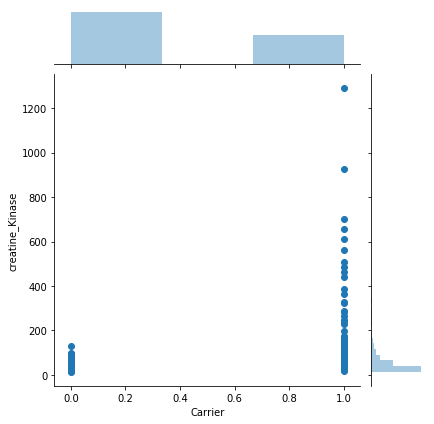

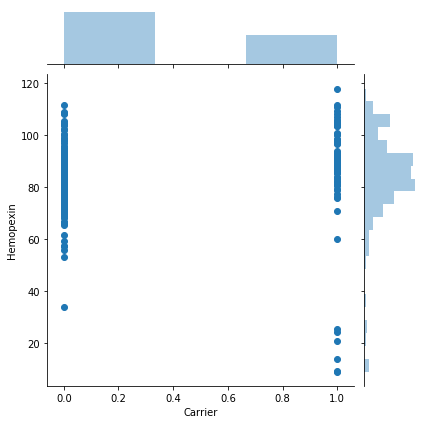

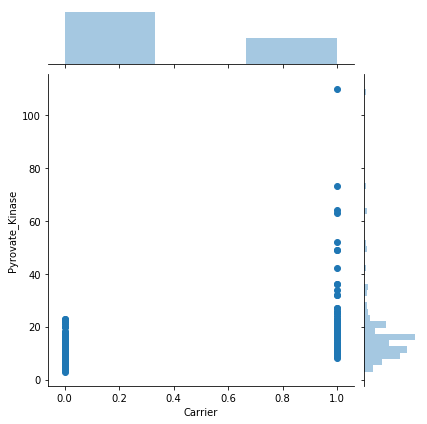

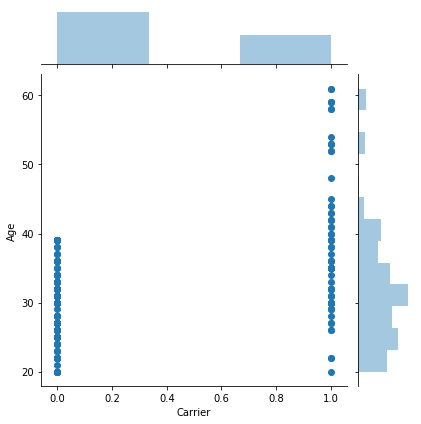

In [52]:
#sns.countplot(df['Age'], bins=30)
sns.jointplot(x='Carrier',y='creatine_Kinase',data=df, kind='scatter')
sns.jointplot(x='Carrier',y='Hemopexin',data=df, kind='scatter')
sns.jointplot(x='Carrier',y='Pyrovate_Kinase',data=df, kind='scatter')
sns.jointplot(x='Carrier',y='Age',data=df, kind='scatter')

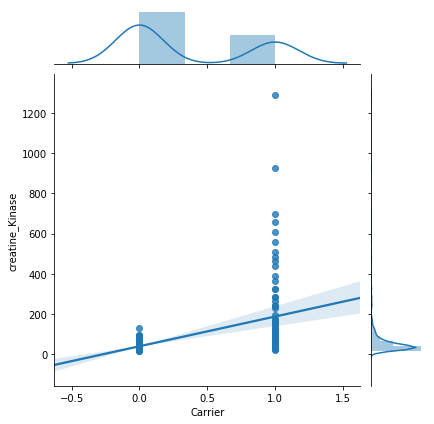

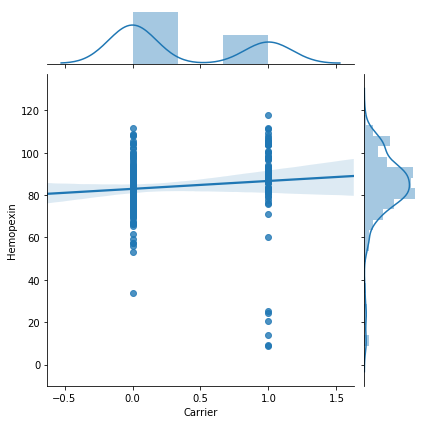

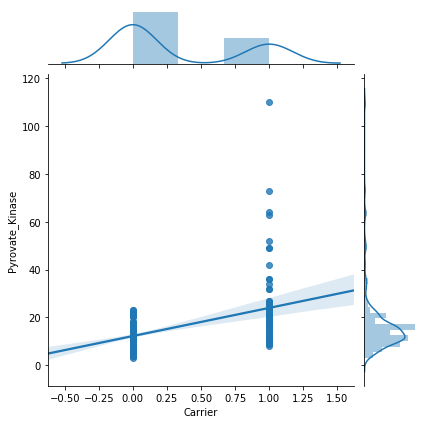

In [10]:
sns.jointplot(x='Carrier',y='creatine_Kinase',data=df, kind='reg')
sns.jointplot(x='Carrier',y='Hemopexin',data=df, kind='reg')
sns.jointplot(x='Carrier',y='Pyrovate_Kinase',data=df, kind='reg')

C:\ProgramData\Anaconda3\Lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\Lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


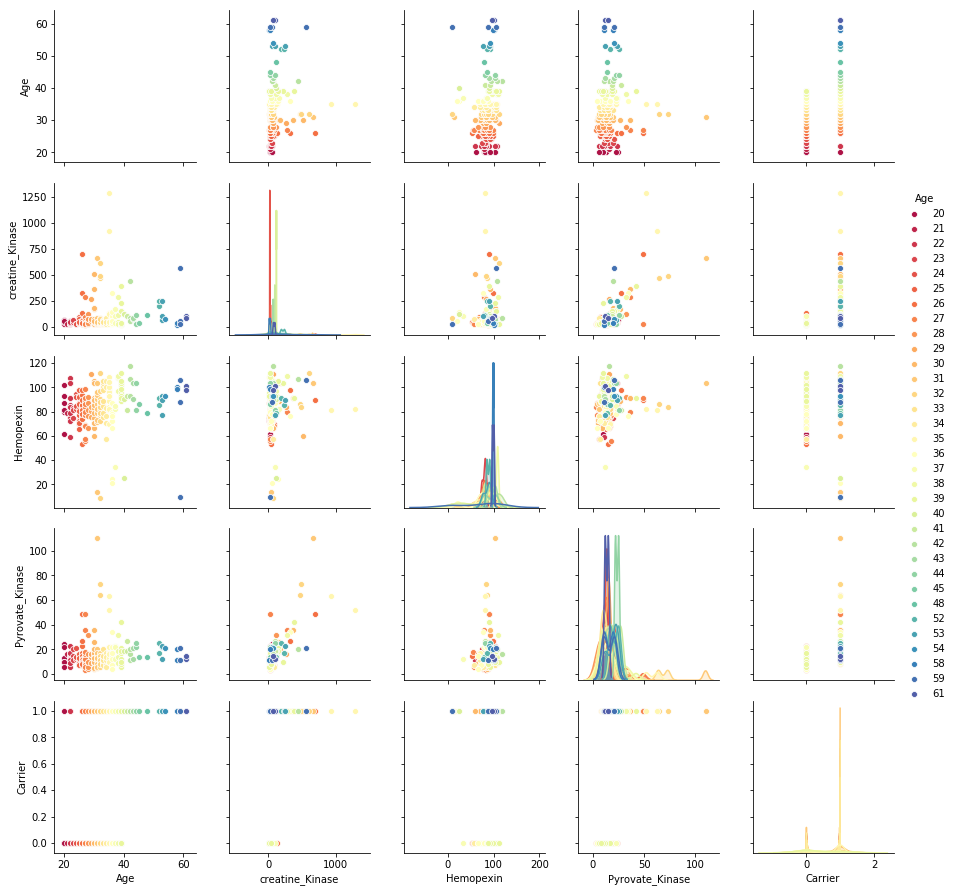

In [69]:
sns.pairplot(df,hue='Age',palette='Spectral')

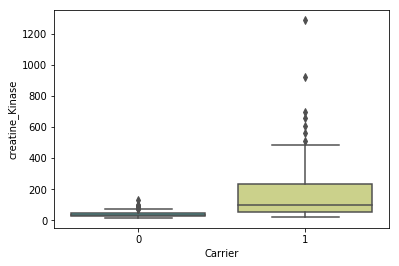

In [53]:
sns.boxplot(x="Carrier", y="creatine_Kinase", data=df,palette='rainbow')


KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x00000218B4CE39D8> (for post_execute):


KeyboardInterrupt: 

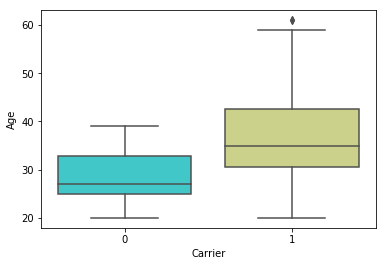

In [56]:
#sns.boxplot(x="Carrier", y="Hemopexin", data=df,palette='rainbow')
#sns.boxplot(x="Carrier", y="Pyrovate_Kinase", data=df,palette='rainbow')
sns.boxplot(x="Carrier", y="Age", data=df,palette='rainbow')

In [ ]:
#g = sns.JointGrid(x="Age", y="creatine_Kinase", data=df)
#g = g.plot(sns.regplot, sns.distplot)

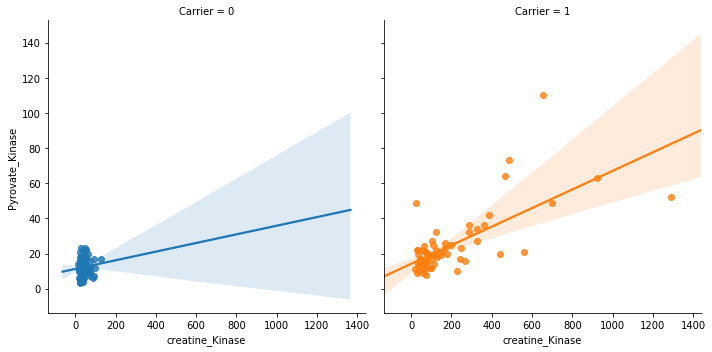

In [66]:
sns.lmplot(x='creatine_Kinase',y='Pyrovate_Kinase',data=df,col='Carrier',hue='Carrier') #regression plot

In [17]:
#table.head()

,sum_sq,df,F,PR(>F)
Age,6.612739,1.0,58.066747,1.058915e-12
creatine_Kinase,0.612560,1.0,5.378915,2.141203e-02
Hemopexin,1.563319,1.0,13.727570,2.748348e-04
Pyrovate_Kinase,1.516061,1.0,13.312601,3.379588e-04
Residual,22.320809,196.0,NaN,NaN


In [2]:
day = "a"

def abxx():
    print(day)
    print(day)
    
abxx()

a
a


In [4]:
y=1
def check():
    y=2
check()

In [49]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
moore = sm.datasets.get_rdataset("Moore", "carData", cache=True) # load
data = moore.data
data = data.rename(columns={"partner.status" :
                             "partner_status"}) # make name pythonic
moore_lm = ols('conformity ~ C(fcategory, Sum)*C(partner_status, Sum)',
                 data=data).fit()
table = sm.stats.anova_lm(moore_lm, typ=1) # Type 2 Anova DataFrame
print(table)

                                            df      sum_sq     mean_sq  \
C(fcategory, Sum)                          2.0    3.733333    1.866667   
C(partner_status, Sum)                     1.0  212.213778  212.213778   
C(fcategory, Sum):C(partner_status, Sum)   2.0  175.488928   87.744464   
Residual                                  39.0  817.763961   20.968307   

                                                  F    PR(>F)  
C(fcategory, Sum)                          0.089023  0.915010  
C(partner_status, Sum)                    10.120692  0.002874  
C(fcategory, Sum):C(partner_status, Sum)   4.184623  0.022572  
Residual                                        NaN       NaN  
